In [1]:
import numpy as np
class LinearRegression:
    def __init__(self,X,y,normalize=False):
        self.X = np.array(X,copy=True)
        self.y = np.array(y,copy=True)
        if X.ndim == 1: 
            X = X[:,None]
        self.mu = self.sigma = None
        if normalize:
            X,self.mu,self.sigma = self.FeatureNormalize(X)
        m,n = X.shape
        self.X = np.column_stack((np.ones((len(X),1)),X))
    def __call__(self,*args,**kwargs):
        return self.GradientDescent(*args,**kwargs)
    def FeatureNormalize(self,X):
        X = np.array(X,copy=True)
        m,n = X.shape
        mu = np.mean(X,axis=0)
        sigma = np.std(X,axis=0,ddof=1)
        for i in range(n):
            X[:,i] = (X[:,i] - mu[i])/(sigma[i] + 1e-100)
        return X,mu,sigma
    def h(self,X,theta):
        return X@theta
    def J(self,theta):
        m,n = self.X.shape
        theta = np.array(theta,copy=True)
        #err = self.X@theta - self.y
        err = self.h(self.X,theta) - self.y
        j = 1/(2*m)*err@err
        return j
    def GradientDescent(self,alpha,theta=None,steps=1000):
        m,n = self.X.shape
        if theta is not None:
            theta = np.array(theta,copy=True)
        else:
            theta = np.zeros(n)
        res = []
        for i in range(steps):
            #dJdtheta = 1/m*self.X.T@(self.X@theta-self.y)
            dJdtheta = 1/m*self.X.T@(self.h(self.X,theta)-self.y) 
            theta = theta - alpha*dJdtheta
            J = self.J(theta)
            res.append([*theta,J])
        res = np.array(res)
        _theta = res[:,:-1]
        _J = res[:,-1]
        return _theta,_J 
    def NormalEqn(self):
        X,XT,y = self.X,self.X.T,self.y
        return np.linalg.pinv(XT@X)@XT@y
    def predict(self,X,theta):
        X = np.array(X,copy=True)
        if self.mu is not None:
            if X.ndim == 1: 
                X = X[:,None]
            m,n = X.shape
            for i in range(n):
                X[:,i] = (X[:,i] - self.mu[i])/(self.sigma[i] + 1e-100) 
        X = np.column_stack((np.ones((len(X),1)),X))
        theta = np.array(theta,copy=True)
        return self.h(X,theta)

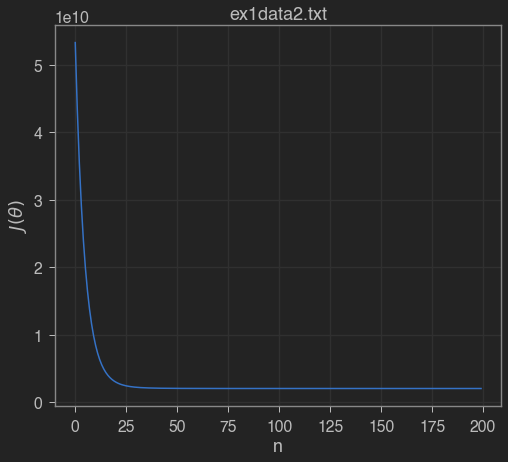

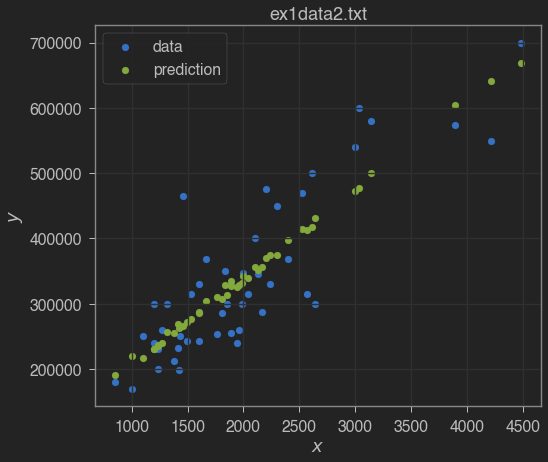

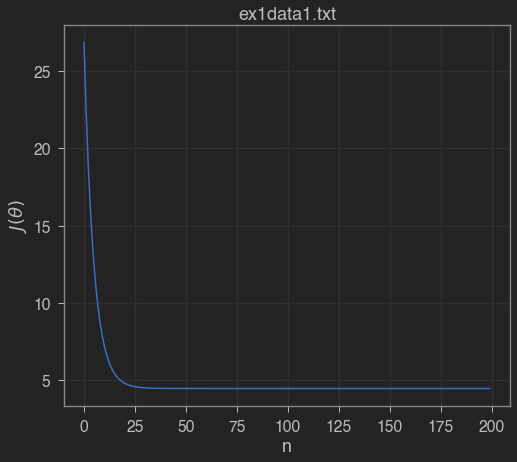

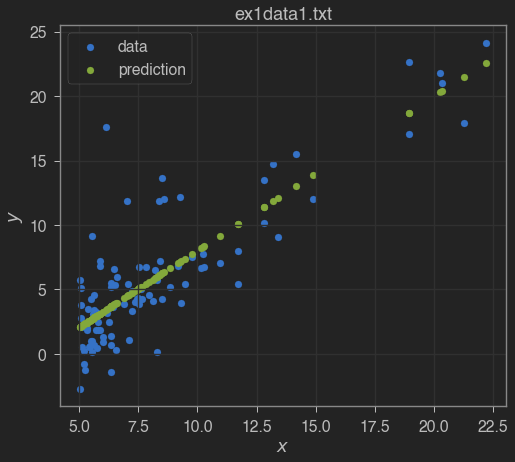

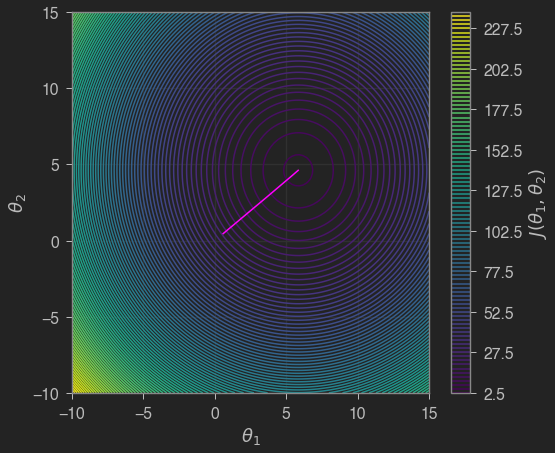

In [2]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="monokai",
             context="notebook", 
             ticks=True,
             fscale=1.5,
             grid=True) 

file = ["ex1data2.txt","ex1data1.txt"]
for _file in file:
    
    with open(_file,"rb") as f:
        data = np.loadtxt(f,delimiter=",")
    X = data[:,0:-1]
    y = data[:,-1]
    coef = np.ones(X.shape[-1])
    
    LR = LinearRegression(X**coef,y,normalize=True)
    _theta,J = LR(0.1,steps=200)
    theta = LR.NormalEqn()
    
    fig,ax = plt.subplots()
    ax.set(xlabel="n",ylabel=r"$J(\theta)$",title=_file)
    ax.plot(J)
    plt.show()
    
    fig,ax = plt.subplots()
    ax.scatter(X[:,0],y,label="data")
    ax.scatter(X[:,0],LR.predict(X**coef,theta),label="prediction")
    ax.set(xlabel="$x$",ylabel="$y$",title=_file)
    plt.legend()
    plt.show()

thetas = np.linspace(-10,15,100)
theta1,theta2 = np.meshgrid(thetas,thetas)
theta = np.column_stack((theta1.ravel(),theta2.ravel()))
J = [LR.J(theta[i]) for i in range(len(theta))]
J = np.array(J).reshape(*theta1.shape)
fig,ax = plt.subplots()
ax.set(xlabel=r"$\theta_1$",ylabel=r"$\theta_2$")
cntr = ax.contour(theta1,theta2,J,100)
fig.colorbar(cntr,label=r"$J(\theta_1,\theta_2)$")
ax.plot(*_theta.T,color="magenta")
plt.show()


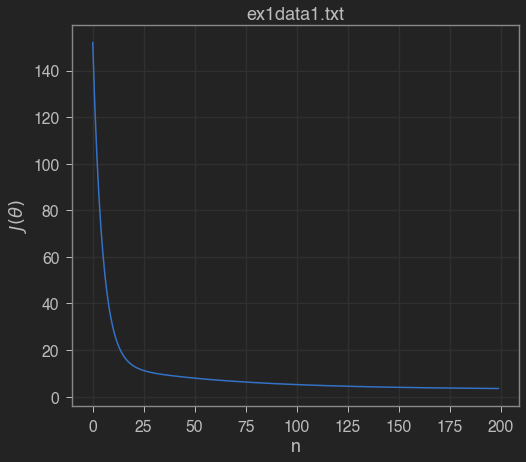

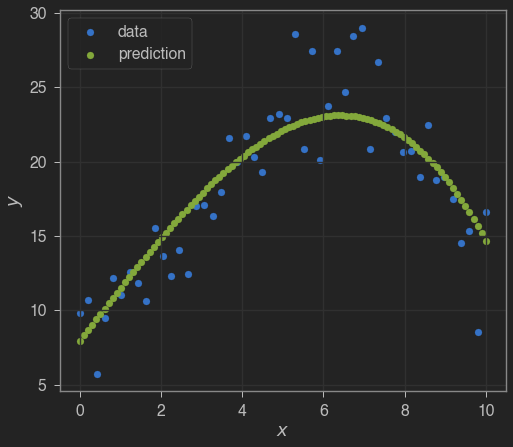

In [3]:
x = np.linspace(0,10,50)
y = 10 - 0.1*x**3 + x**2 + 2*np.random.randn(len(x))

X = x[:,None]
coef = np.array([1,2,3])

LR = LinearRegression(X**coef,y,normalize=True)
_theta,J = LR(0.1,steps=200)
theta = _theta[-1]
fig,ax = plt.subplots()
ax.set(xlabel="n",ylabel=r"$J(\theta)$",title=_file)
ax.plot(J)
plt.show()

Xnew = np.linspace(0,10,100)[:,None]
fig,ax = plt.subplots()
ax.scatter(X[:,0],y,label="data")
ax.scatter(Xnew[:,0],LR.predict(Xnew**coef,theta),label="prediction")
ax.set(xlabel="$x$",ylabel="$y$")
plt.legend()
plt.show()

In [4]:
x = np.linspace(0,3,4)
x = np.meshgrid(*(2*[x]))
x = np.array(x).T.reshape(-1,2)
print(x)

[[0. 0.]
 [0. 1.]
 [0. 2.]
 [0. 3.]
 [1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [2. 0.]
 [2. 1.]
 [2. 2.]
 [2. 3.]
 [3. 0.]
 [3. 1.]
 [3. 2.]
 [3. 3.]]
